In [8]:
import math
import matplotlib.pyplot as plt
import keras
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping

import tensorflow as tf
tf.config.experimental.set_visible_devices([], 'GPU')

df=pd.read_csv("./LSTM_데이터/TSLA.csv")
print('Number of rows and columns:', df.shape)
df

Number of rows and columns: (1259, 7)


,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-08-14,72.926003,73.531998,72.519997,72.760002,72.760002,22596000
1,2017-08-15,73.040001,73.098000,71.874001,72.466003,72.466003,15425500
2,2017-08-16,72.599998,73.300003,72.503998,72.582001,72.582001,17069000
3,2017-08-17,72.241997,72.660004,70.318001,70.384003,70.384003,25138500
4,2017-08-18,70.582001,70.800003,69.160004,69.491997,69.491997,27041000
...,...,...,...,...,...,...,...
1254,2022-08-08,885.000000,915.599976,867.260010,871.270020,871.270020,32998000
1255,2022-08-09,870.880005,877.190002,838.059998,850.000000,850.000000,28748200
1256,2022-08-10,891.200012,892.530029,850.109985,883.070007,883.070007,31639600
1257,2022-08-11,889.539978,894.710022,857.500000,859.890015,859.890015,23385000


In [9]:
#open price를 target value로 한다
training_set = df.iloc[:800, 1:2].values
test_set = df.iloc[800:, 1:2].values

# Feature Scaling
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)
# Creating a data structure with 60 time-steps and 1 output
X_train = []
y_train = []
for i in range(60, 800):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
#(740, 60, 1)



In [10]:
model = Sequential()

#Adding the first LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50))
model.add(Dropout(0.2))

# Adding the output layer
model.add(Dense(units = 1))

# Compiling the RNN
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
# Fitting the RNN to the Training set
model.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
24/24 [==============================] - 3s 42ms/step - loss: 0.0198
Epoch 2/100
24/24 [==============================] - 1s 47ms/step - loss: 0.0036
Epoch 3/100
24/24 [==============================] - 1s 42ms/step - loss: 0.0060
Epoch 4/100
24/24 [==============================] - 1s 43ms/step - loss: 0.0028
Epoch 5/100
24/24 [==============================] - 1s 47ms/step - loss: 0.0026
Epoch 6/100
24/24 [==============================] - 1s 46ms/step - loss: 0.0027
Epoch 7/100
24/24 [==============================] - 1s 49ms/step - loss: 0.0029
Epoch 8/100
24/24 [==============================] - 1s 47ms/step - loss: 0.0034
Epoch 9/100
24/24 [==============================] - 1s 46ms/step - loss: 0.0023
Epoch 10/100
24/24 [==============================] - 1s 46ms/step - loss: 0.0038
Epoch 11/100
24/24 [==============================] - 1s 46ms/step - loss: 0.0029
Epoch 12/100
24/24 [==============================] - 1s 48ms/step - loss: 0.0028
Epoch 13/100
24/24 [=====

In [11]:
# Getting the predicted stock price of 2017

dataset_train = df.iloc[:800, 1:2]

dataset_test = df.iloc[800:, 1:2]

dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)

inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values

inputs = inputs.reshape(-1,1)

inputs = sc.transform(inputs)

X_test = []

for i in range(60, 519):

    X_test.append(inputs[i-60:i, 0])

X_test = np.array(X_test)

X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

print(X_test.shape)

# (459, 60, 1)

(459, 60, 1)


In [12]:

predicted_stock_price = model.predict(X_test)

predicted_stock_price = sc.inverse_transform(predicted_stock_price)

15/15 [==============================] - 1s 10ms/step


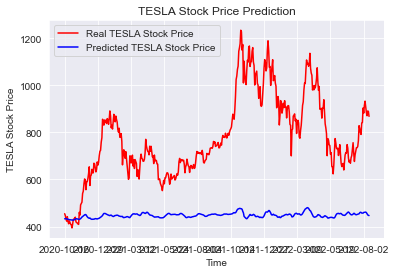

In [13]:
# Visualising the results

plt.plot(df.loc[800:, 'Date'],dataset_test.values, color = 'red', label = 'Real TESLA Stock Price')

plt.plot(df.loc[800:, 'Date'],predicted_stock_price, color = 'blue', label = 'Predicted TESLA Stock Price')

plt.xticks(np.arange(0,459,50))

plt.title('TESLA Stock Price Prediction')

plt.xlabel('Time')

plt.ylabel('TESLA Stock Price')

plt.legend()

plt.show()